# Import Libaraies

In [26]:
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import matplotlib.pyplot as plt

# Importing Data

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train/255
X_test = X_test/255

# Create Model

In [29]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9873 - accuracy: 0.7071 - val_loss: 0.4809 - val_accuracy: 0.8613
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4344 - accuracy: 0.8731 - val_loss: 0.3595 - val_accuracy: 0.8928
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3644 - accuracy: 0.8943 - val_loss: 0.3213 - val_accuracy: 0.9074
Epoch 4/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3313 - accuracy: 0.9035 - val_loss: 0.2968 - val_accuracy: 0.9152
Epoch 5/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3064 - accuracy: 0.9111 - val_loss: 0.2747 - val_accuracy: 0.9222
Epoch 6/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2831 - accuracy: 0.9182 - val_loss: 0.2580 - val_accuracy: 0.9237
Epoch 7/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.9249 - val_loss: 0.2462 - val_accuracy:

In [33]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 747us/step


In [34]:
y_pred = y_prob.argmax(axis=1)

In [35]:
accuracy_score(y_test, y_pred)

0.8542

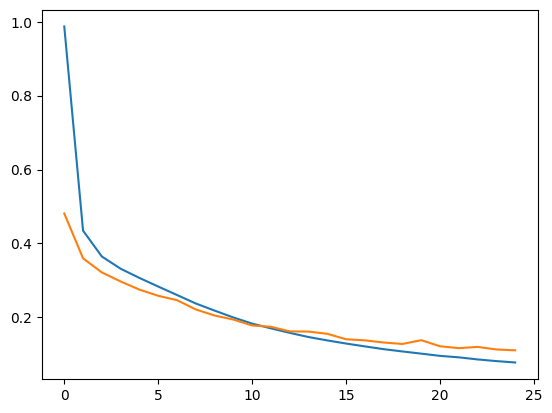

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

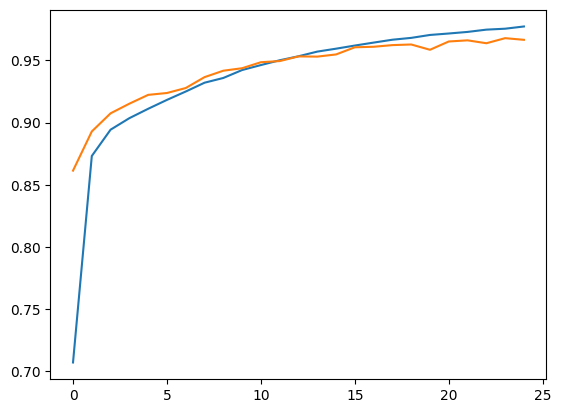

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])